In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df_fea = pd.read_csv('W_features.csv')
df_sam_sub = pd.read_csv('W_sample_submission.csv')
df_store = pd.read_csv('W_store.csv')

In [3]:
print(df_fea.shape)
df_fea.head()

(8190, 14)


Unnamed: 0  index  Store        Date  Temperature  Fuel_Price  MarkDown1  \
0           0      0      1  2010-02-05        42.31       2.572        NaN   
1           1      1      1  2010-02-12        38.51       2.548        NaN   
2           2      2      1  2010-02-19        39.93       2.514        NaN   
3           3      3      1  2010-02-26        46.63       2.561        NaN   
4           4      4      1  2010-03-05        46.50       2.625        NaN   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        NaN        NaN        NaN        NaN  211.096358         8.106   
1        NaN        NaN        NaN        NaN  211.242170         8.106   
2        NaN        NaN        NaN        NaN  211.289143         8.106   
3        NaN        NaN        NaN        NaN  211.319643         8.106   
4        NaN        NaN        NaN        NaN  211.350143         8.106   

   IsHoliday  
0          0  
1          1  
2          0  
3          0  
4          0

In [4]:
print(df_sam_sub.shape)
df_sam_sub.head()
# what purpose is this dataframe?

(115064, 4)


Unnamed: 0  index              Id  Weekly_Sales
0           0      0  1_1_2012-11-02             0
1           1      1  1_1_2012-11-09             0
2           2      2  1_1_2012-11-16             0
3           3      3  1_1_2012-11-23             0
4           4      4  1_1_2012-11-30             0

In [5]:
print(df_store.shape)
df_store.head()

(45, 5)


Unnamed: 0  index  Store Type    Size
0           0      0      1    A  151315
1           1      1      2    A  202307
2           2      2      3    B   37392
3           3      3      4    A  205863
4           4      4      5    B   34875

In [9]:
df_store_fea = pd.merge( df_fea, df_store, how = 'outer', on='Store', )

In [11]:
print(df_store_fea.shape)

df_store_fea

(8190, 18)


Unnamed: 0_x  index_x  Store        Date  Temperature  Fuel_Price  \
0                0        0      1  2010-02-05        42.31       2.572   
1                1        1      1  2010-02-12        38.51       2.548   
2                2        2      1  2010-02-19        39.93       2.514   
3                3        3      1  2010-02-26        46.63       2.561   
4                4        4      1  2010-03-05        46.50       2.625   
...            ...      ...    ...         ...          ...         ...   
8185          8185     8185     45  2013-06-28        76.05       3.639   
8186          8186     8186     45  2013-07-05        77.50       3.614   
8187          8187     8187     45  2013-07-12        79.37       3.614   
8188          8188     8188     45  2013-07-19        82.84       3.737   
8189          8189     8189     45  2013-07-26        76.06       3.804   

      MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0           NaN        NaN        NaN        NaN        NaN  211.096358   
1           NaN        NaN        NaN        NaN        NaN  211.242170   
2           NaN        NaN        NaN        NaN        NaN  211.289143   
3           NaN        NaN        NaN        NaN        NaN  211.319643   
4           NaN        NaN        NaN        NaN        NaN  211.350143   
...         ...        ...        ...        ...        ...         ...   
8185    4842.29     975.03       3.00    2449.97    3169.69         NaN   
8186    9090.48    2268.58     582.74    5797.47    1514.93         NaN   
8187    3789.94    1827.31      85.72     744.84    2150.36         NaN   
8188    2961.49    1047.07     204.19     363.00    1059.46         NaN   
8189     212.02     851.73       2.06      10.88    1864.57         NaN   

      Unemployment  IsHoliday  Unnamed: 0_y  index_y Type    Size  
0            8.106          0             0        0    A  151315  
1            8.106          1             0        0    A  151315  
2            8.106          0             0        0    A  151315  
3            8.106          0             0        0    A  151315  
4            8.106          0             0        0    A  151315  
...            ...        ...           ...      ...  ...     ...  
8185           NaN          0            44       44    B  118221  
8186           NaN          0            44       44    B  118221  
8187           NaN          0            44       44    B  118221  
8188           NaN          0            44       44    B  118221  
8189           NaN          0            44       44    B  118221  

[8190 rows x 18 columns]

In [12]:
df_store_fea.isnull().sum()

Unnamed: 0_x       0
index_x            0
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Unnamed: 0_y       0
index_y            0
Type               0
Size               0
dtype: int64

In [17]:
columns_to_drop = ['Unnamed: 0_x', 'Unnamed: 0_y','index_x', 'index_y' ]


In [18]:
df_store_fea = df_store_fea.drop(columns_to_drop, axis=1)

In [20]:
df_store_fea.shape

(8190, 14)

In [21]:
df_store_fea.value_counts()

Store  Date        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  CPI         Unemployment  IsHoliday  Type  Size  
45     2013-04-19  56.27        3.676       1399.81    39.89       44.38     60.83      1445.05    193.589304  8.335         0          B     118221    1
14     2012-03-23  59.45        3.900       4718.70    348.81      6.85      353.11     3726.39    190.536321  8.424         0          A     200898    1
13     2013-01-11  20.00        2.982       3726.82    17212.29   -23.97     116.72     2662.80    131.957000  5.372         0          A     219622    1
       2013-01-18  11.44        2.914       6847.96    5267.27     5.18      933.65     3113.78    132.030871  5.372         0          A     219622    1
       2013-01-25  14.75        2.927       3250.58    2576.84     1.00      81.67      2360.57    132.092290  5.372         0          A     219622    1
                                                                                 

In [22]:
#df_store_fea.to_csv(r'df_store_fea.csv')

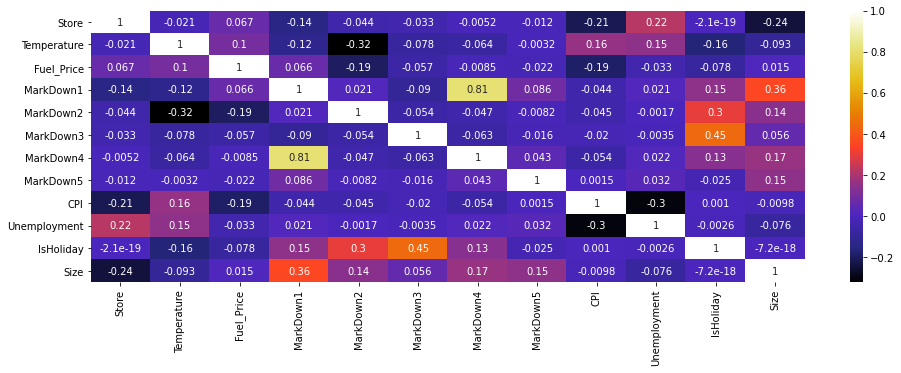

In [26]:

from matplotlib import pyplot as plt
import seaborn as sns
data = df_store_fea.corr()
plt.figure(figsize = ( 16,5))

dataplot = sns.heatmap(data, cmap = "CMRmap", annot = True)

/home/zebfred/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


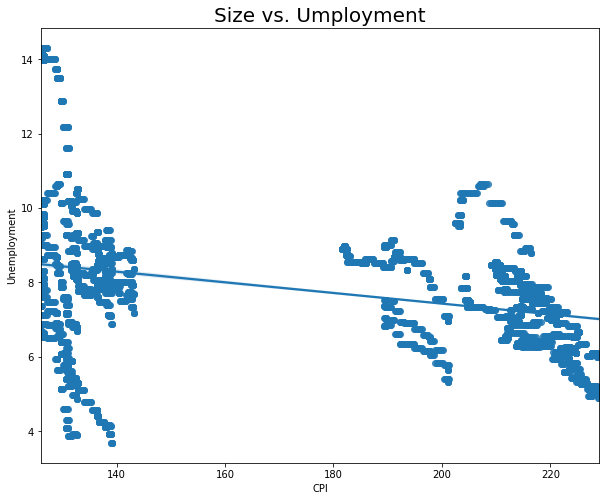

In [27]:
#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(df_store_fea.CPI, df_store_fea.Unemployment)
plt.title('Size vs. Umployment', fontsize = 20)
plt.show()

/home/zebfred/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


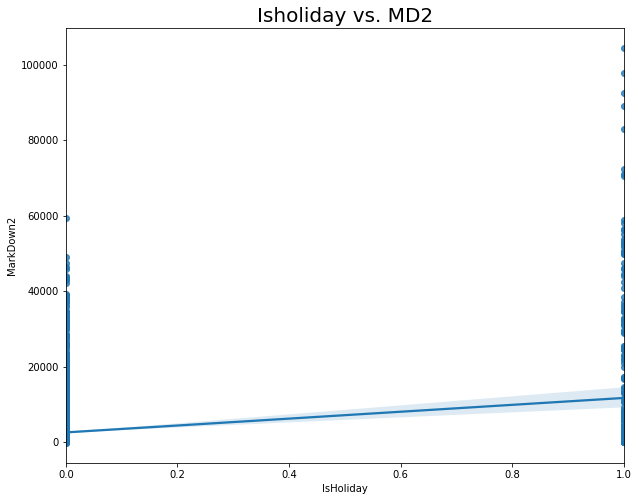

In [28]:

#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(df_store_fea.IsHoliday, df_store_fea.MarkDown2)
plt.title('Isholiday vs. MD2', fontsize = 20)
plt.show()

/home/zebfred/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


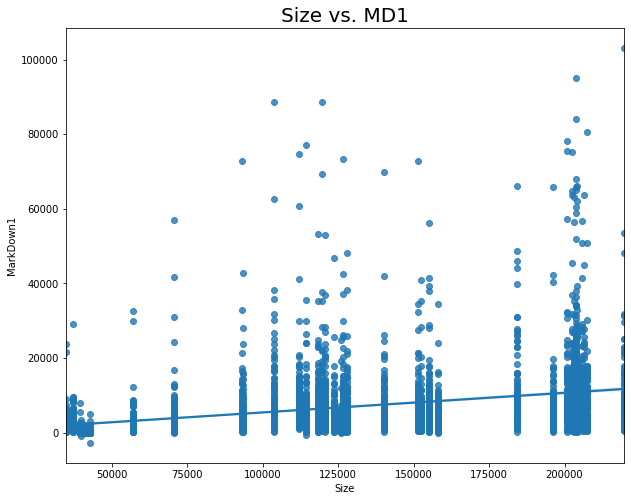

In [29]:
#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(df_store_fea.Size, df_store_fea.MarkDown1)
plt.title('Size vs. MD1', fontsize = 20)
plt.show()

/home/zebfred/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


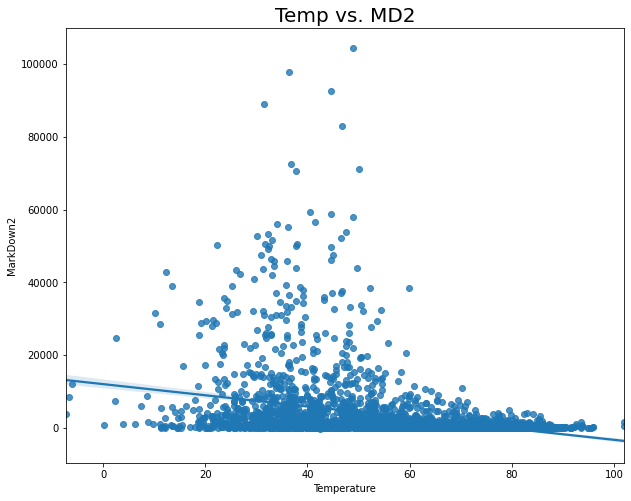

In [30]:
#Plotting Regplot with Seaborn
plt.figure(figsize = (10,8))
sns.regplot(df_store_fea.Temperature, df_store_fea.MarkDown2)
plt.title('Temp vs. MD2', fontsize = 20)
plt.show()

In [23]:

from pandas_profiling import ProfileReport as PPR

In [24]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
# run with caution very finacy 
#profile = PPR(df_store_fea)

In [25]:

profile

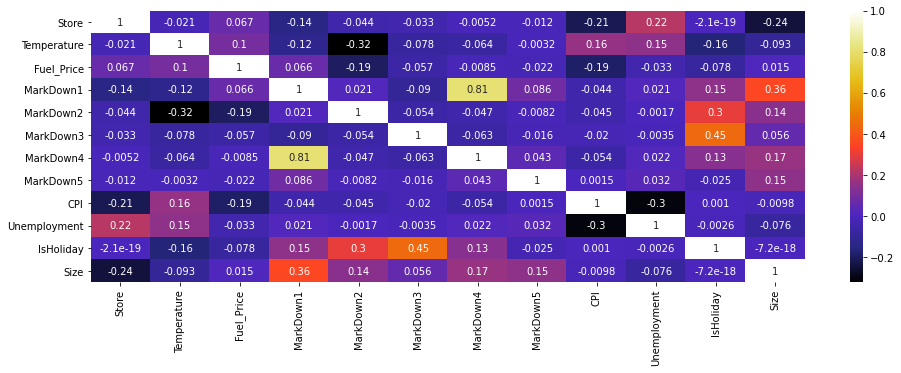

In [32]:

from matplotlib import pyplot as plt
import seaborn as sns
data = df_store_fea.corr()
plt.figure(figsize = ( 16,5))

dataplot = sns.heatmap(data, cmap = "CMRmap", annot = True)

In [36]:
df_store_fea.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [37]:
df_store_fea.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

         IsHoliday           Size  
count  8190.000000    8190.000000  
mean      0.071429  130287.600000  
std       0.257555   63115.971429  
min       0.000000   34875.000000  
25%       0.000000   70713.000000  
50%       0.000000  126512.000000  
75%       0.000000  202307.000000  
max       1.000000  219622.000000

In [38]:
df_store_fea.value_counts()

Store  Date        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  CPI         Unemployment  IsHoliday  Type  Size  
45     2013-04-19  56.27        3.676       1399.81    39.89       44.38     60.83      1445.05    193.589304  8.335         0          B     118221    1
14     2012-03-23  59.45        3.900       4718.70    348.81      6.85      353.11     3726.39    190.536321  8.424         0          A     200898    1
13     2013-01-11  20.00        2.982       3726.82    17212.29   -23.97     116.72     2662.80    131.957000  5.372         0          A     219622    1
       2013-01-18  11.44        2.914       6847.96    5267.27     5.18      933.65     3113.78    132.030871  5.372         0          A     219622    1
       2013-01-25  14.75        2.927       3250.58    2576.84     1.00      81.67      2360.57    132.092290  5.372         0          A     219622    1
                                                                                 

In [39]:
df_store_fea['MarkDown1'].nunique()

4023

In [41]:
df_store_fea['MarkDown1'].describe()

count      4032.000000
mean       7032.371786
std        9262.747448
min       -2781.450000
25%        1577.532500
50%        4743.580000
75%        8923.310000
max      103184.980000
Name: MarkDown1, dtype: float64

In [42]:
df_store_fea['MarkDown2'].describe()

count      2921.000000
mean       3384.176594
std        8793.583016
min        -265.760000
25%          68.880000
50%         364.570000
75%        2153.350000
max      104519.540000
Name: MarkDown2, dtype: float64

In [43]:
df_store_fea['MarkDown3'].describe()

count      3613.000000
mean       1760.100180
std       11276.462208
min        -179.260000
25%           6.600000
50%          36.260000
75%         163.150000
max      149483.310000
Name: MarkDown3, dtype: float64

In [44]:
df_store_fea['MarkDown4'].describe()

count     3464.000000
mean      3292.935886
std       6792.329861
min          0.220000
25%        304.687500
50%       1176.425000
75%       3310.007500
max      67474.850000
Name: MarkDown4, dtype: float64

In [45]:
df_store_fea['MarkDown5'].describe()

count      4050.000000
mean       4132.216422
std       13086.690278
min        -185.170000
25%        1440.827500
50%        2727.135000
75%        4832.555000
max      771448.100000
Name: MarkDown5, dtype: float64

In [46]:
df_store_fea['CPI'].describe()

count    7605.000000
mean      172.460809
std        39.738346
min       126.064000
25%       132.364839
50%       182.764003
75%       213.932412
max       228.976456
Name: CPI, dtype: float64

In [47]:
df_store_fea['Unemployment'].describe()

count    7605.000000
mean        7.826821
std         1.877259
min         3.684000
25%         6.634000
50%         7.806000
75%         8.567000
max        14.313000
Name: Unemployment, dtype: float64

In [48]:
df_store_fea['Unemployment']

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
8185      NaN
8186      NaN
8187      NaN
8188      NaN
8189      NaN
Name: Unemployment, Length: 8190, dtype: float64

In [ ]:
#df_store_fea.fillna
"""

 m = df.mean(axis=1)
         for i, col in enumerate(df):
             # using i allows for duplicate columns
             # inplace *may* not always work here, so IMO the next line is preferred
             # df.iloc[:, i].fillna(m, inplace=True)
             df.iloc[:, i] = df.iloc[:, i].fillna(m)
        """

In [50]:
df_clean = df_store_fea.T.fillna(df_store_fea.mean(axis=1)).T

In [51]:
df_clean

Store        Date Temperature Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
0        1  2010-02-05       42.31      2.572   21654.3   21654.3   21654.3   
1        1  2010-02-12       38.51      2.548   21653.9   21653.9   21653.9   
2        1  2010-02-19       39.93      2.514     21654     21654     21654   
3        1  2010-02-26       46.63      2.561   21654.9   21654.9   21654.9   
4        1  2010-03-05        46.5      2.625   21654.9   21654.9   21654.9   
...    ...         ...         ...        ...       ...       ...       ...   
8185    45  2013-06-28       76.05      3.639   4842.29    975.03         3   
8186    45  2013-07-05        77.5      3.614   9090.48   2268.58    582.74   
8187    45  2013-07-12       79.37      3.614   3789.94   1827.31     85.72   
8188    45  2013-07-19       82.84      3.737   2961.49   1047.07    204.19   
8189    45  2013-07-26       76.06      3.804    212.02    851.73      2.06   

     MarkDown4 MarkDown5      CPI Unemployment IsHoliday Type    Size  
0      21654.3   21654.3  211.096        8.106         0    A  151315  
1      21653.9   21653.9  211.242        8.106         1    A  151315  
2        21654     21654  211.289        8.106         0    A  151315  
3      21654.9   21654.9   211.32        8.106         0    A  151315  
4      21654.9   21654.9   211.35        8.106         0    A  151315  
...        ...       ...      ...          ...       ...  ...     ...  
8185   2449.97   3169.69  12978.6      12978.6         0    B  118221  
8186   5797.47   1514.93  13760.1      13760.1         0    B  118221  
8187    744.84   2150.36  12694.7      12694.7         0    B  118221  
8188       363   1059.46  12398.8      12398.8         0    B  118221  
8189     10.88   1864.57  12128.7      12128.7         0    B  118221  

[8190 rows x 14 columns]

In [53]:
df_clean.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [52]:
#df_clean.to_csv('Wal_fea_store.csv')